In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-3/train.csv
/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv


In [2]:
# Loading and visualizing training data
training_data=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/train.csv')
training_data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
23557,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23558,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23559,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23560,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0


In [3]:
# Countries
print('Countries:',training_data.Country_Region.unique())
print('Number of countries:',len(training_data.Country_Region.unique()))

Countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'J

In [4]:
# Time Frame
print('Data has been collected from',training_data.Date.min(),'to',training_data.Date.max())

Data has been collected from 2020-01-22 to 2020-04-07


         Id Province_State Country_Region        Date  ConfirmedCases  \
9702  13483            NaN        Germany  2020-01-22             0.0   
9703  13484            NaN        Germany  2020-01-23             0.0   
9704  13485            NaN        Germany  2020-01-24             0.0   
9705  13486            NaN        Germany  2020-01-25             0.0   
9706  13487            NaN        Germany  2020-01-26             0.0   
...     ...            ...            ...         ...             ...   
9774  13555            NaN        Germany  2020-04-03         91159.0   
9775  13556            NaN        Germany  2020-04-04         96092.0   
9776  13557            NaN        Germany  2020-04-05        100123.0   
9777  13558            NaN        Germany  2020-04-06        103374.0   
9778  13559            NaN        Germany  2020-04-07        107663.0   

      Fatalities  
9702         0.0  
9703         0.0  
9704         0.0  
9705         0.0  
9706         0.0  
...      

Text(0.02, 0.5, 'Count')

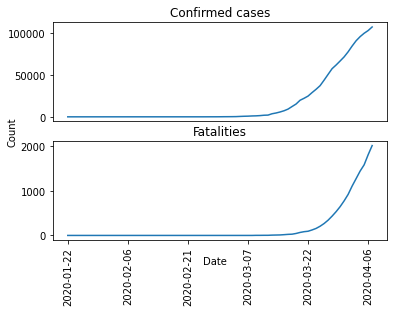

In [5]:
# Trend of confirmed case and fatality growth in Germany
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

germany_data = training_data.loc[training_data['Country_Region'] == 'Germany']
print(germany_data)
print('Number of province states:',len(germany_data.Province_State.unique()),'(',germany_data.Province_State.unique(),')')
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Confirmed cases')
ax2.title.set_text('Fatalities')
ax2.xaxis.set_major_locator(MultipleLocator(15))
germany_data_specific = germany_data[['Id','Date','ConfirmedCases','Fatalities']]
plt.xticks(rotation=90)
ax1.plot(germany_data_specific['Date'],germany_data_specific['ConfirmedCases'])
ax1.set_xticks([])
ax2.plot(germany_data_specific['Date'],germany_data_specific['Fatalities'])
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

One can observe that the increase in deaths is slighly sharper than the increasing in the number of confirmed cases in Germany. However, the number of deaths are lower in comparison with the number of confirmed Covid-19 positive cases.

Number of province states: 33 ( ['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Tianjin' 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang'] )


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


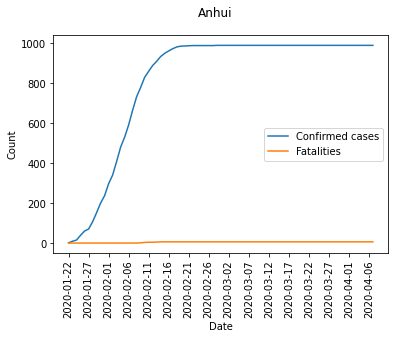

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


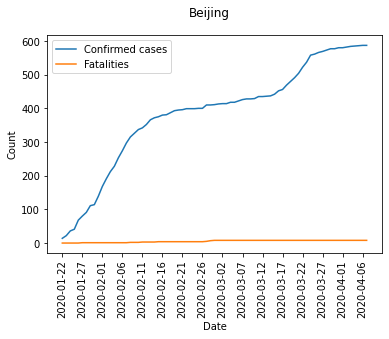

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


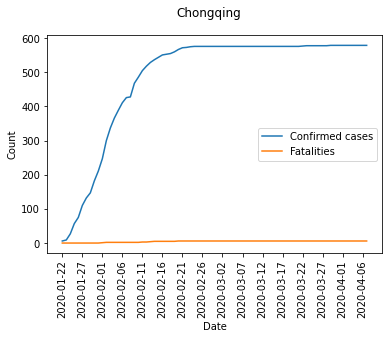

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


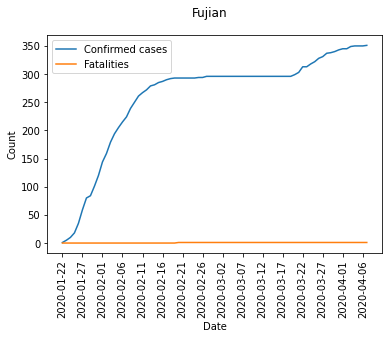

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


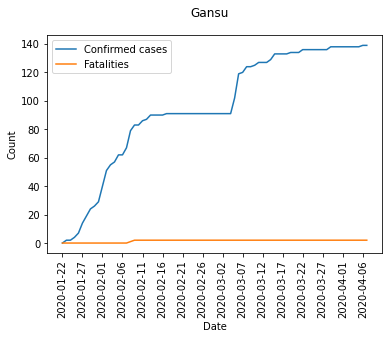

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


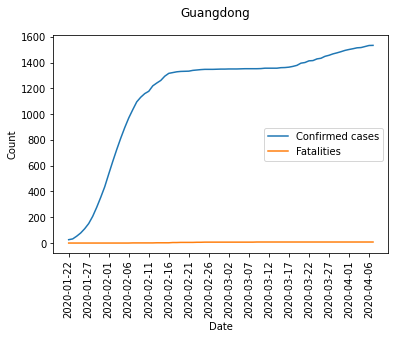

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


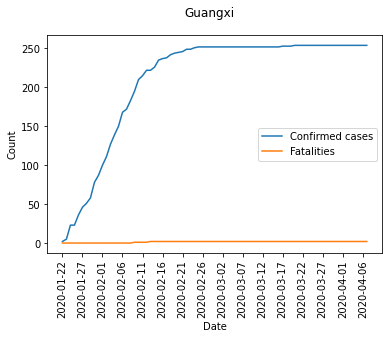

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


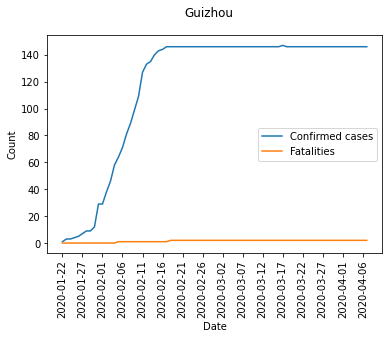

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


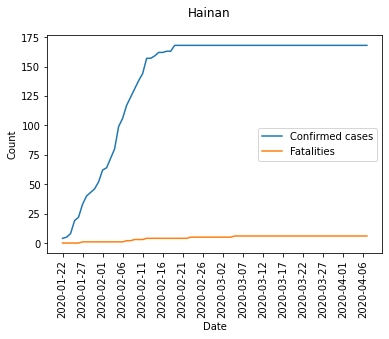

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


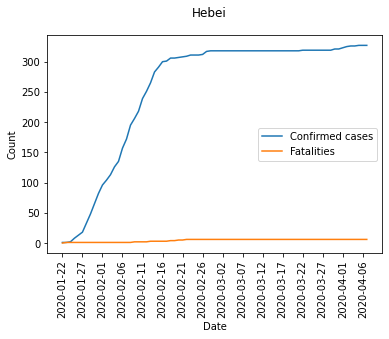

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


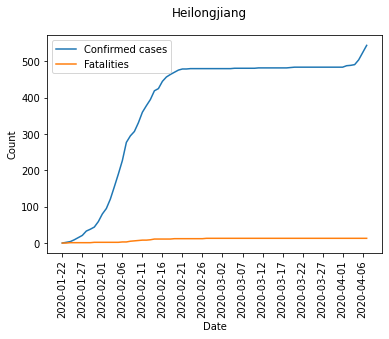

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


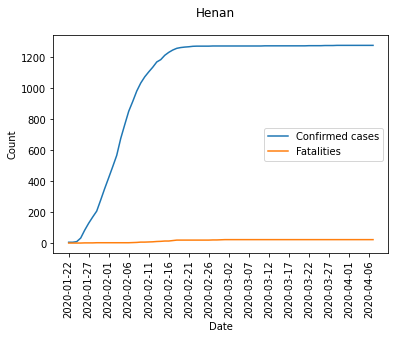

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


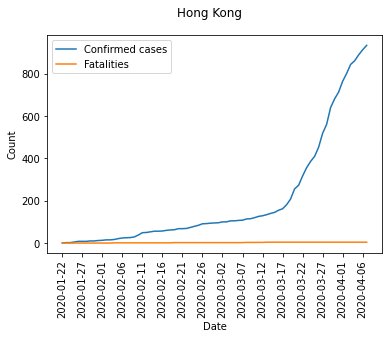

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


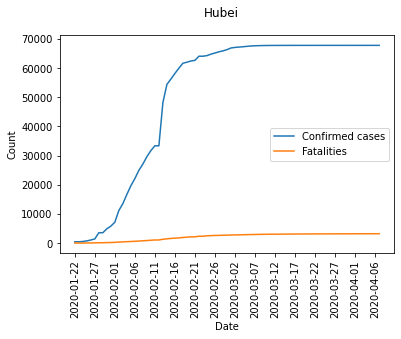

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


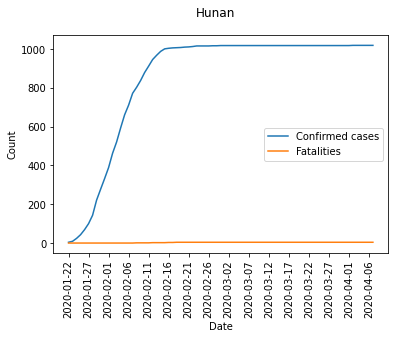

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


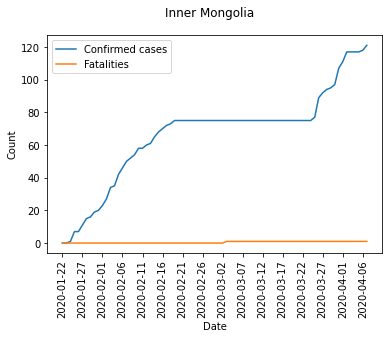

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


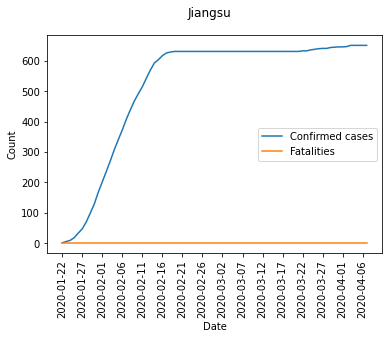

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


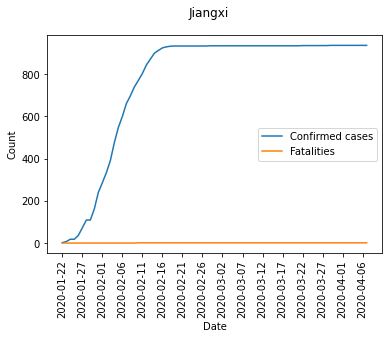

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


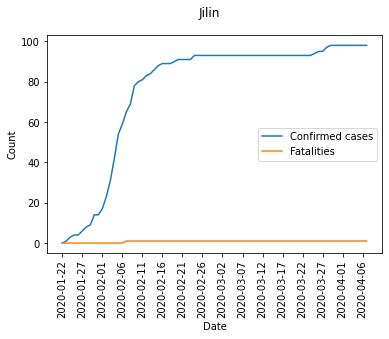

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


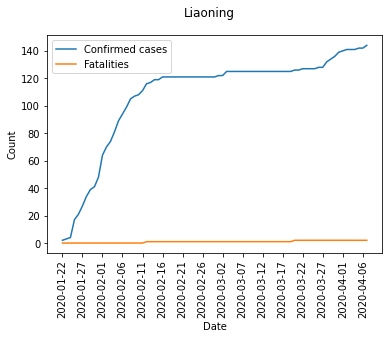

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


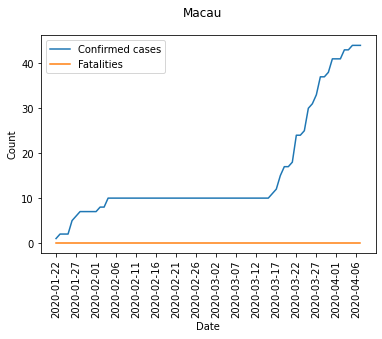

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


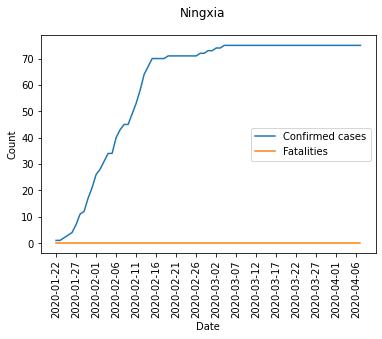

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


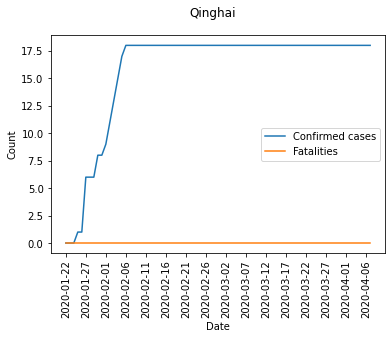

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


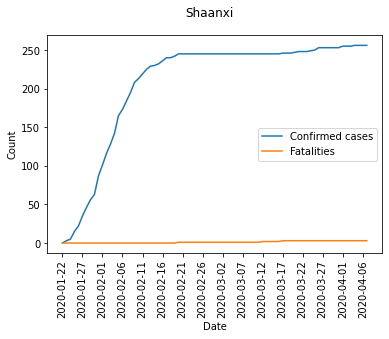

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


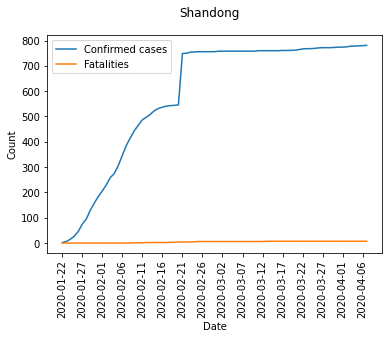

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


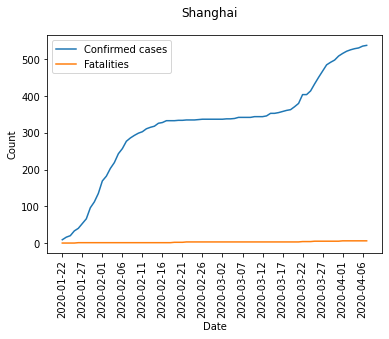

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


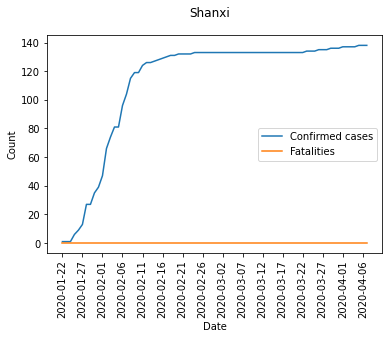

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


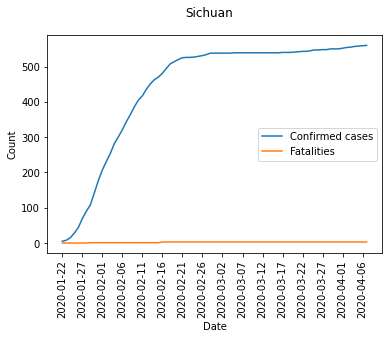

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


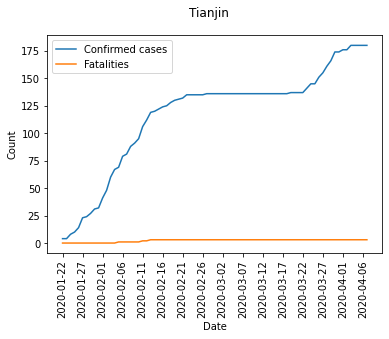

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


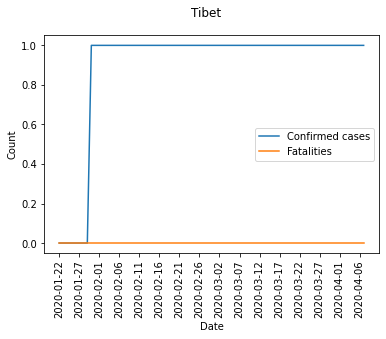

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


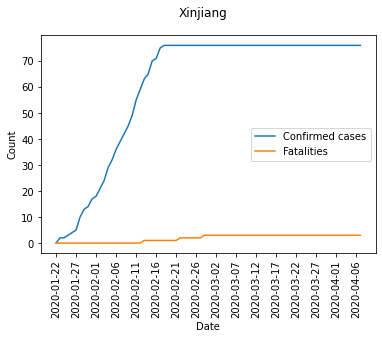

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


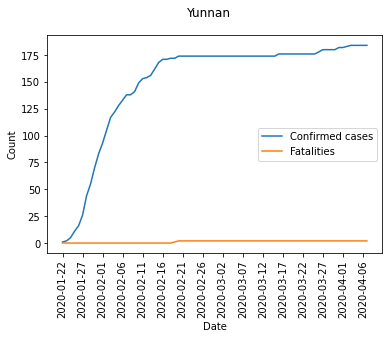

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


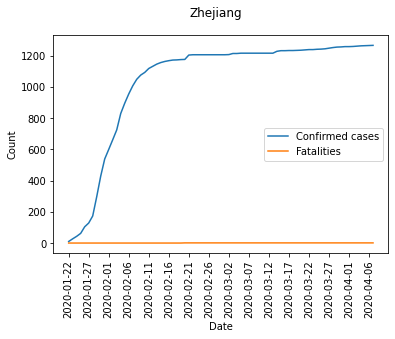

In [6]:
# Trend of confirmed case and fatality growth in China
import math
from datetime import datetime
import matplotlib.pyplot as plt

china_data = training_data.loc[training_data['Country_Region'] == 'China']
# print(china_data.to_string())
print('Number of province states:',len(china_data.Province_State.unique()),'(',china_data.Province_State.unique(),')')
tibet_data = china_data.loc[china_data['Province_State'] == 'Tibet']
# print(tibet_data.to_string())
# Plotting trend for each province
for a in china_data.Province_State.unique():
    plt.figure()
    china_province_specific = china_data.loc[china_data['Province_State'] == a]
    plt.plot(china_province_specific['Date'],china_province_specific['ConfirmedCases'],label = 'Confirmed cases')
    plt.plot(china_province_specific['Date'],china_province_specific['Fatalities'],label = 'Fatalities')
    plt.suptitle(a)
    ax = plt.axes()
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()

The above plots show that most provinces in China have a stagnation in the rise of confirmed positive cases starting from the 16th of February. The curve is flat for about a month with few/no new positive cases reported.   A sudden rise in these numbers is seen around the 17th of March for most provinces. Inner Mongolia, an autonomous region in northern China shows a similar flat curve, however the sudden peak in the numbers is shifted by a week to around the 23rd of March. Hongkong, a special administrative region of China shows a different trend, where the curve does not flatten, it rather increases gradually and shows a sharp increase around the 17th of March. Macau, a special administrative region of China has a flat curve starting from around the 6th of February and shows a sudden increase in the number of confirmed positive cases at around the 17th of March. Qinghai, a sparsely populated Chinese province has reported very few confirmed cases and has no new cases starting from around the 6th of February onward. Tibet, a Chinese autonomous region has reported only 1 confirmed case in late January. Very few fatalities have been reported, resulting in an almost flat curve for all provinces. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


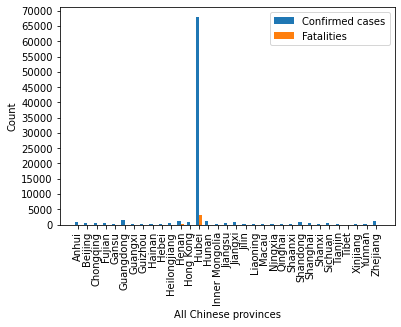

In [7]:
# Comparing different provinces in China
X = np.arange(len(china_data.Province_State.unique()))
fig = plt.figure()
width = 0.35 
max_confirmed_province=[]
max_deaths_province=[]
for a in china_data.Province_State.unique():
    data = china_data.loc[china_data['Province_State'] == a]
    max_confirmed_province.append(data['ConfirmedCases'].max())
    max_deaths_province.append(data['Fatalities'].max())
plt.bar(X, max_confirmed_province, width,label='Confirmed cases')
plt.bar(X + width, max_deaths_province, width,label='Fatalities')
ax1 = plt.axes()
ax1.set_xlabel('All Chinese provinces')
ax1.set_ylabel('Count')
ax1.yaxis.set_major_locator(MultipleLocator(5000))
plt.xticks(rotation='vertical')
plt.xticks(X + width / 2, china_data.Province_State.unique())    
plt.legend()
plt.show()

Hubei province has reported the highest number of confirmed cases and deaths in China. The number of positive cases in Hubei is significantly higher than other Chinese provinces.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


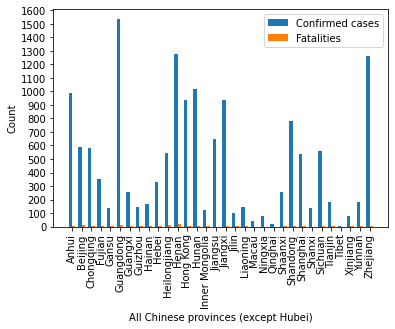

In [8]:
# Comparing different provinces in China except Hubei
X = np.arange(len(china_data.Province_State.unique())-1)
fig = plt.figure()
width = 0.35 
max_confirmed_province=[]
max_deaths_province=[]
for a in china_data.Province_State.unique():
    data = china_data.loc[china_data['Province_State'] == a]
    if a!='Hubei':
        max_confirmed_province.append(data['ConfirmedCases'].max())
        max_deaths_province.append(data['Fatalities'].max())
plt.bar(X, max_confirmed_province, width,label='Confirmed cases')
plt.bar(X + width, max_deaths_province, width,label='Fatalities')
ax1 = plt.axes()
ax1.set_xlabel('All Chinese provinces (except Hubei)')
ax1.set_ylabel('Count')
ax1.yaxis.set_major_locator(MultipleLocator(100))
plt.xticks(rotation='vertical')
temp = china_data.Province_State.unique()
result = np.where(temp == 'Hubei')
provinces_except_Hubei = np.delete(temp,result)
plt.xticks(X + width / 2, provinces_except_Hubei)    
plt.legend()
plt.show()

The above bar chart shows that Guangdong has reported the highest number of cases after Hubei. Its neighbouring province of Henan also shows a high number of positive cases along with the coastal province of Zheijiang. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


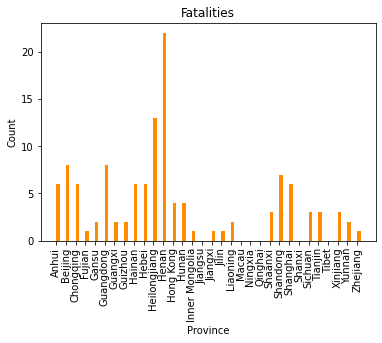

In [9]:
# Comparing death counts in the different provinces of China except Hubei   
X = np.arange(len(china_data.Province_State.unique())-1)
fig = plt.figure()
width = 0.35 
max_deaths_province=[]
for a in china_data.Province_State.unique():
    data = china_data.loc[china_data['Province_State'] == a]
    if a!='Hubei':
        max_deaths_province.append(data['Fatalities'].max())

plt.bar(X + width, max_deaths_province, width, color='darkorange')
ax1 = plt.axes()
ax1.title.set_text('Fatalities')
ax1.set_xlabel('Province')
ax1.set_ylabel('Count')
ax1.yaxis.set_major_locator(MultipleLocator(5))
# Displays count above each bar
# for i, v in enumerate(max_deaths_province):
    # ax1.text(i , v + 0.2, str(int(v)), color='blue', fontweight='bold', rotation='vertical')
plt.xticks(rotation='vertical')
temp = china_data.Province_State.unique()
result = np.where(temp == 'Hubei')
provinces_except_Hubei = np.delete(temp,result)
plt.xticks(X + width / 2, provinces_except_Hubei)    
plt.show()    

The above bar graph depicts that Hubei's neighbouring province Henan has the highest number of deaths after Hubei. Guangdong that reported more positive cases than Henan however has fewer fatalities. Macau, Ningxia (a small autonomous region), Qinghai and Tibet have reported no fatalities.

Number of province states: 1 ( [nan] )


Text(0.02, 0.5, 'Count')

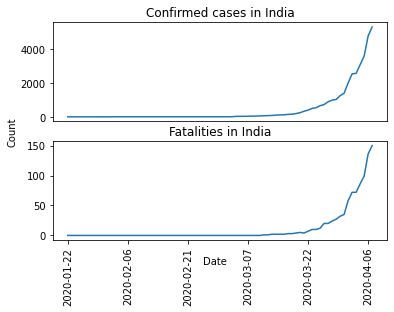

In [10]:
# Trend of confirmed case and fatality growth in India
import math
from datetime import datetime
import matplotlib.pyplot as plt

india_data = training_data.loc[training_data['Country_Region'] == 'India']
# print(india_data.to_string())
print('Number of province states:',len(india_data.Province_State.unique()),'(',india_data.Province_State.unique(),')')
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Confirmed cases in India')
ax2.title.set_text('Fatalities in India')
ax2.xaxis.set_major_locator(MultipleLocator(15))
plt.xticks(rotation=90)
ax1.plot(india_data['Date'],india_data['ConfirmedCases'])
ax1.set_xticks([])
ax2.plot(india_data['Date'],india_data['Fatalities'])
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

The number of confirmed cases and fatalities in India show an increasing trend from around the 22nd of March onwards.

Number of province states: 1 ( [nan] )


Text(0.02, 0.5, 'Count')

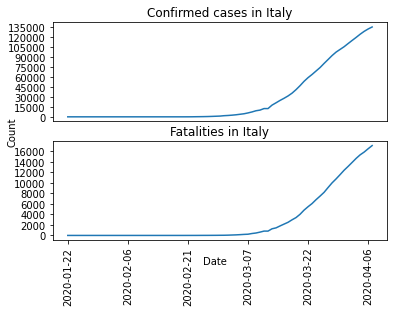

In [11]:
# Trend of confirmed case and fatality growth in Italy
import math
from datetime import datetime
import matplotlib.pyplot as plt

italy_data = training_data.loc[training_data['Country_Region'] == 'Italy']
# print(italy_data.to_string())
print('Number of province states:',len(italy_data.Province_State.unique()),'(',italy_data.Province_State.unique(),')')
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Confirmed cases in Italy')
ax2.title.set_text('Fatalities in Italy')
ax2.xaxis.set_major_locator(MultipleLocator(15))
ax1.yaxis.set_major_locator(MultipleLocator(15000))
ax2.yaxis.set_major_locator(MultipleLocator(2000))
plt.xticks(rotation=90)
ax1.plot(italy_data['Date'],italy_data['ConfirmedCases'])
ax1.set_xticks([])
ax2.plot(italy_data['Date'],italy_data['Fatalities'])
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

From around the 14th of March onwards, Italy has reported a rapid increase in the number of positive cases as well as fatalities. 

Number of province states: 1 ( [nan] )


Text(0.02, 0.5, 'Count')

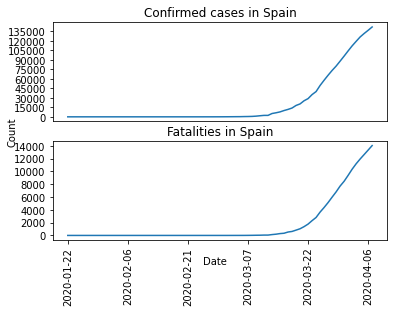

In [12]:
# Trend of confirmed case and fatality growth in Spain
import math
from datetime import datetime
import matplotlib.pyplot as plt

spain_data = training_data.loc[training_data['Country_Region'] == 'Spain']
# print(spain_data.to_string())
print('Number of province states:',len(spain_data.Province_State.unique()),'(',spain_data.Province_State.unique(),')')
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Confirmed cases in Spain')
ax2.title.set_text('Fatalities in Spain')
ax2.xaxis.set_major_locator(MultipleLocator(15))
ax1.yaxis.set_major_locator(MultipleLocator(15000))
ax2.yaxis.set_major_locator(MultipleLocator(2000))
plt.xticks(rotation=90)
ax1.plot(spain_data['Date'],spain_data['ConfirmedCases'])
ax1.set_xticks([])
ax2.plot(spain_data['Date'],spain_data['Fatalities'])
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

From around the 22nd of March onwards, Spain has reported a rapid increase in the number of positive cases as well as fatalities. 

Number of province states: 10 ( ['Anguilla' 'Bermuda' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Gibraltar' 'Isle of Man' 'Montserrat'
 'Turks and Caicos Islands' 'Unknown province'] )


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


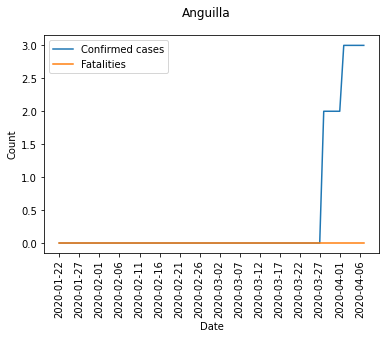

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


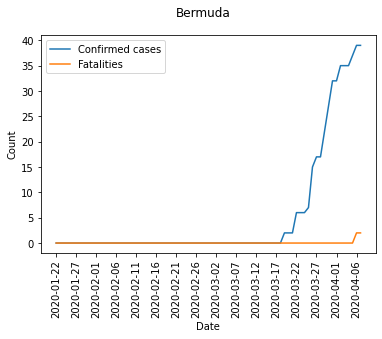

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


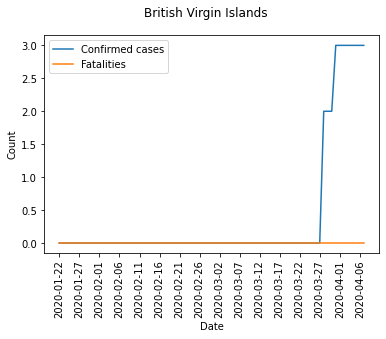

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


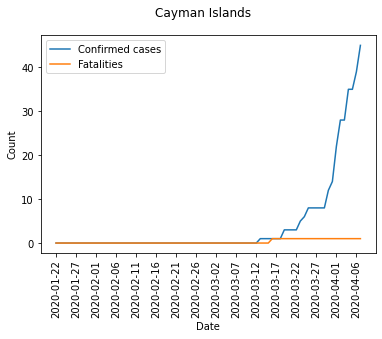

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


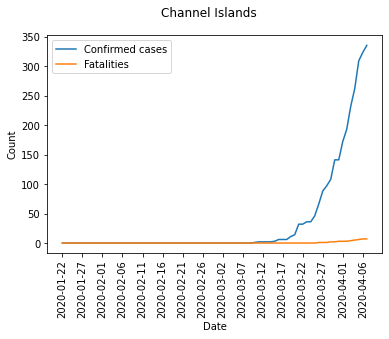

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


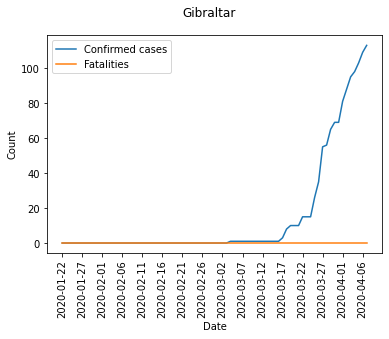

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


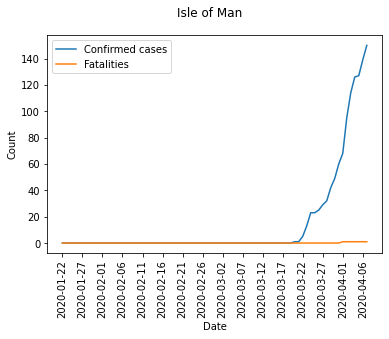

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


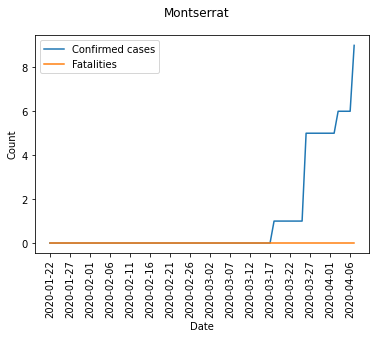

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


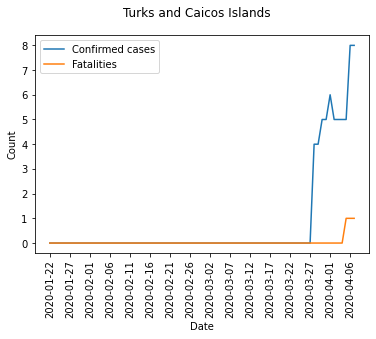

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


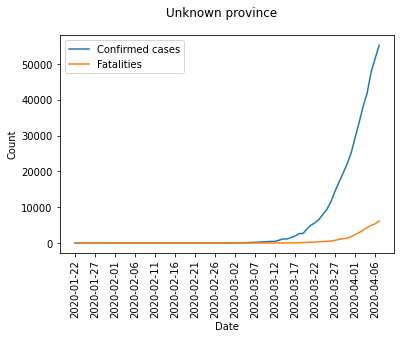

In [13]:
# Trend of confirmed case and fatality growth in the United Kingdom
import math
from datetime import datetime
import matplotlib.pyplot as plt

uk_data = training_data.loc[training_data['Country_Region'] == 'United Kingdom']
# print(uk_data.to_string())
uk_data = uk_data.fillna('Unknown province')
# print(uk_data.to_string())
print('Number of province states:',len(uk_data.Province_State.unique()),'(',uk_data.Province_State.unique(),')')
for a in uk_data.Province_State.unique():
    plt.figure()
    uk_province_specific = uk_data.loc[uk_data['Province_State'] == a]
    plt.plot(uk_province_specific['Date'],uk_province_specific['ConfirmedCases'],label = 'Confirmed cases')
    plt.plot(uk_province_specific['Date'],uk_province_specific['Fatalities'],label = 'Fatalities')
    plt.suptitle(a)
    ax = plt.axes()
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()

Around the time period between the 22nd and the 27th of March, there is a steep rise in the number of confirmed cases in almost all provinces of the UK. The number of deaths appear to be low in comparision. The number of cases in the UK's overseas territories is very few in comparision with the unknown province, which with most probability should correspond to mainland UK consisting of England, Scotland, Wales and Northern Ireland.

Number of province states: 1 ( [nan] )


Text(0.02, 0.5, 'Count')

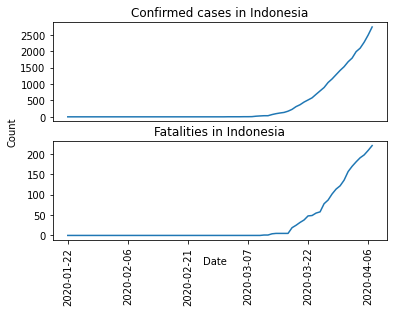

In [14]:
# Trend of confirmed case and fatality growth in Indonesia
import math
from datetime import datetime
import matplotlib.pyplot as plt

indonesia_data = training_data.loc[training_data['Country_Region'] == 'Indonesia']
# print(indonesia_data.to_string())
print('Number of province states:',len(indonesia_data.Province_State.unique()),'(',indonesia_data.Province_State.unique(),')')
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text('Confirmed cases in Indonesia')
ax2.title.set_text('Fatalities in Indonesia')
ax2.xaxis.set_major_locator(MultipleLocator(15))
ax1.yaxis.set_major_locator(MultipleLocator(500))
ax2.yaxis.set_major_locator(MultipleLocator(50))
plt.xticks(rotation=90)
ax1.plot(indonesia_data['Date'],indonesia_data['ConfirmedCases'])
ax1.set_xticks([])
ax2.plot(indonesia_data['Date'],indonesia_data['Fatalities'])
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')

The number of deaths in Indonesia appear to be higher for the number of confirmed positive cases when compared with other countries.